In [ ]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Mini projecto: MLP - multiclass

In [ ]:
# == Q1 == 
# Considera un problema de clasificación binaria, en donde queremos separar
# imágenes de los dígitos 5 y 9. ¿Qué etiquetas usarías y en qué formato?

# Utilizaría etiquetas binarias en formato de entero con los valores 0 y 1 donde  
# un valor de esos indica que es el dígito 5 y la otra opción es el 9.
# De esta manera, podemos categorizar estas imágenes que no tienen una 
# relación de orden. Además, involucrando únicamente dos tipos de imágenes 
# usando One Hot y sus etiquetas binarias permite fácilmente optimizar 
# la separación de imágenes y cálculos para describir los conjuntos de 
# imágenes.

In [ ]:
# == Q2 ==
# ¿Por qué es conveniente usar la activación sigmoide en la capa de salida de
# una red neuronal para clasificación binaria?

#Porque la función sigmoide asegura que el rango de la salida esté entre 0 y 1
# lo cual permite que usemos un threshold para el etiquetado sin necesidad de
# normalizar los datos

[2.72, 7.39, 20.09, 54.6, 2.72, 7.39, 20.09]
114.98
[0.024, 0.064, 0.175, 0.475, 0.024, 0.064, 0.175]


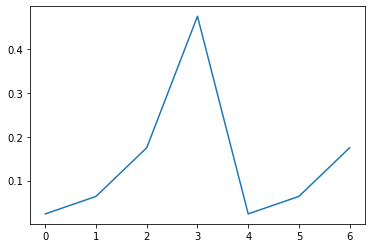

In [ ]:
# == Q3 ==
# Investiga qué forma tiene la función softmax, y explica por qué es conveniente
# en la activación de salida de una red neuronal para clasificación multi clase.

#La función Softmax es una generalización de la función exponencial normalizada
#Esta función asigna probabilidades decimales de calsificaión a cada clase en
#un caso de clases múltiples.
#Es conveniente para la salida de una red neuronal para clasificación multi clase
#porque permite que a cada una de las etiquetas se le asigne una probabilidad de
#aparicion y esto permite realizar clasificaciones multiclases pues cada una de
#las clases tiene un valor dado de salida de la NN para pertenencia a dicha clase.

#Un ejemplo de la función softmax es el siguiente:
import math
import matplotlib
z = [1.0, 2.0, 3.0, 4.0, 1.0, 2.0, 3.0]
z_exp = [math.exp(i) for i in z]
print([round(i, 2) for i in z_exp])

sum_z_exp = sum(z_exp)
print(round(sum_z_exp, 2))

softmax = [round(i / sum_z_exp, 3) for i in z_exp]
print(softmax)

softmaxEtiquetas=[x for x in softmax]
matplotlib.pyplot.plot(softmaxEtiquetas)

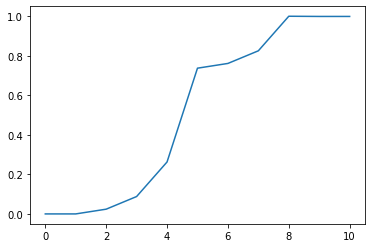

In [ ]:
#La forma que tiene softmax en este ejemplo es:
acum=0
y=[0,0]

for x in softmaxEtiquetas:
  acum+=x
  y.append(acum)
y.append(1)
y.append(1)
matplotlib.pyplot.plot(y)

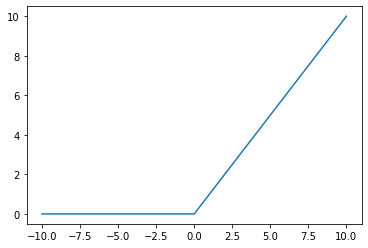

In [ ]:
# == Q4 ==
# Investiga qué forma tiene la función ReLU, y explica en qué tipo de capas de
# redes neuronales se usa comunmente.


#La función Relu es la función Y=max(0,x), donde en números negativos regresa 0
# y en números positivos regresa el número. Esta función es usada comunmente en
# las capas intermedias pues evita que existan números negativos que afecten los
# resultados de los perceptrones y no modifica los positivos.

#La forma que tiene la función es la siguiente:
import matplotlib
x=list(range(-10,11))
y=[max(0,n) for n in x]

matplotlib.pyplot.plot(x,y)

In [ ]:
# == Q5 ==
# Usa entre 1 y 5 capas (tú decide el número de nodos por capa), y trata de
# maximizar el desempeño de clasificación para el problema de 10 classes.
# En una tabla, reporta los hiperparámetros de tus 5 mejores modelos y su
# desempeño de clasificación.

from sklearn.datasets import make_classification
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Se crea clasificador con 10 clases para después verificar su desempeño
X, y = make_classification(
    n_samples=100, n_features=10, n_classes=10, n_informative=5, random_state=0
)

# Se crea una función que regresa el modelo utilizado para maximizar el 
# desempeño

def build_modelo(optim):
    mlp = Sequential(name='TenClass')
    #Se añaden las entradas que se utilizarán para el modelo
    mlp.add(Input(shape=(784,)))
    mlp.add(Dense(units=512, activation='relu'))
    mlp.add(Dense(units=128, activation='relu'))
    mlp.add(Dense(units=10,  activation='softmax'))
    # Se compila el modelo utilizando pérdida mse y regresando un arreglo de 
    # valores precision, recall y auc.
    # Precision indica la frecuencia en que se predice correctamente la etiqueta
    # Recall opera los aciertos divididos entre aciertos + falsos negativos
    # AUC indica el área bajo la curva al graficar la función
    mlp.compile(
        loss="mse",
        optimizer=optim,
        metrics=[
            keras.metrics.Precision(name="precision"), 
            keras.metrics.Recall(name="recall"),
            keras.metrics.AUC(name="auc"),
        ],
    )
    return mlp


# Training Modelo 1
mlp_prueba1 = build_modelo('sgd')
history_prueba1 = mlp_prueba1.fit(x=x_train, y=y_train, batch_size=25, epochs=50, validation_split=0.1)


Epoch 1/50
2160/2160 [==============================] - 7s 3ms/step - loss: 0.0863 - precision: 1.0000 - recall: 2.7778e-04 - auc: 0.6780 - val_loss: 0.0801 - val_precision: 1.0000 - val_recall: 0.0027 - val_auc: 0.8079
Epoch 2/50
2160/2160 [==============================] - 7s 3ms/step - loss: 0.0714 - precision: 0.9949 - recall: 0.0765 - auc: 0.8688 - val_loss: 0.0612 - val_precision: 0.9962 - val_recall: 0.1765 - val_auc: 0.9233
Epoch 3/50
2160/2160 [==============================] - 7s 3ms/step - loss: 0.0531 - precision: 0.9839 - recall: 0.2768 - auc: 0.9453 - val_loss: 0.0424 - val_precision: 0.9879 - val_recall: 0.3950 - val_auc: 0.9747
Epoch 4/50
2160/2160 [==============================] - 6s 3ms/step - loss: 0.0382 - precision: 0.9762 - recall: 0.4831 - auc: 0.9749 - val_loss: 0.0297 - val_precision: 0.9811 - val_recall: 0.6240 - val_auc: 0.9858
Epoch 5/50
2160/2160 [==============================] - 7s 3ms/step - loss: 0.0296 - precision: 0.9674 - recall: 0.6422 - auc: 0.982

In [ ]:
# Training Modelo 2
mlp_prueba2 = build_modelo('rmsprop')
history_prueba2 = mlp_prueba2.fit(x=x_train, y=y_train, batch_size=25, epochs=50, validation_split=0.1)

Epoch 1/50
2160/2160 [==============================] - 8s 4ms/step - loss: 0.0104 - precision: 0.9487 - recall: 0.9175 - auc: 0.9939 - val_loss: 0.0043 - val_precision: 0.9758 - val_recall: 0.9683 - val_auc: 0.9980
Epoch 2/50
2160/2160 [==============================] - 8s 3ms/step - loss: 0.0052 - precision: 0.9701 - recall: 0.9652 - auc: 0.9960 - val_loss: 0.0049 - val_precision: 0.9696 - val_recall: 0.9675 - val_auc: 0.9966
Epoch 3/50
2160/2160 [==============================] - 8s 3ms/step - loss: 0.0041 - precision: 0.9765 - recall: 0.9740 - auc: 0.9963 - val_loss: 0.0040 - val_precision: 0.9766 - val_recall: 0.9755 - val_auc: 0.9962
Epoch 4/50
2160/2160 [==============================] - 8s 3ms/step - loss: 0.0033 - precision: 0.9805 - recall: 0.9790 - auc: 0.9968 - val_loss: 0.0041 - val_precision: 0.9750 - val_recall: 0.9740 - val_auc: 0.9971
Epoch 5/50
2160/2160 [==============================] - 7s 3ms/step - loss: 0.0028 - precision: 0.9834 - recall: 0.9821 - auc: 0.9972 - 

In [ ]:
#Training Modelo 3
mlp_prueba3 = build_modelo('adam')
history_prueba3 = mlp_prueba3.fit(x=x_train, y=y_train, batch_size=25, epochs=50, validation_split=0.1)

Epoch 1/50
2160/2160 [==============================] - 7s 3ms/step - loss: 0.0103 - precision: 0.9504 - recall: 0.9161 - auc: 0.9944 - val_loss: 0.0049 - val_precision: 0.9735 - val_recall: 0.9618 - val_auc: 0.9975
Epoch 2/50
2160/2160 [==============================] - 7s 3ms/step - loss: 0.0049 - precision: 0.9728 - recall: 0.9645 - auc: 0.9973 - val_loss: 0.0050 - val_precision: 0.9720 - val_recall: 0.9653 - val_auc: 0.9972
Epoch 3/50
2160/2160 [==============================] - 7s 3ms/step - loss: 0.0039 - precision: 0.9775 - recall: 0.9729 - auc: 0.9978 - val_loss: 0.0043 - val_precision: 0.9755 - val_recall: 0.9702 - val_auc: 0.9970
Epoch 4/50
2160/2160 [==============================] - 7s 3ms/step - loss: 0.0031 - precision: 0.9820 - recall: 0.9785 - auc: 0.9976 - val_loss: 0.0039 - val_precision: 0.9772 - val_recall: 0.9737 - val_auc: 0.9969
Epoch 5/50
2160/2160 [==============================] - 7s 3ms/step - loss: 0.0028 - precision: 0.9839 - recall: 0.9816 - auc: 0.9978 - 

In [ ]:
#Training Modelo 4
mlp_prueba4 = build_modelo('adadelta')
history_prueba4 = mlp_prueba4.fit(x=x_train, y=y_train, batch_size=25, epochs=50, validation_split=0.1)

Epoch 1/50
2160/2160 [==============================] - 7s 3ms/step - loss: 0.0904 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5235 - val_loss: 0.0899 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5504
Epoch 2/50
2160/2160 [==============================] - 7s 3ms/step - loss: 0.0896 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5673 - val_loss: 0.0891 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5985
Epoch 3/50
2160/2160 [==============================] - 7s 3ms/step - loss: 0.0887 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.6158 - val_loss: 0.0882 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6495
Epoch 4/50
2160/2160 [==============================] - 7s 3ms/step - loss: 0.0879 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.6654 - val_loss: 0.0873 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6984
Epoch 5/50
2160/2160 [==============================] - 7s 3ms/step - lo

In [ ]:
#Training Modelo 5
# Se hizo una prueba con Ftrl pero al dar una precisión de 0.0000e+00 se descartó

mlp_prueba5 = build_modelo('adagrad')
history_prueba5 = mlp_prueba5.fit(x=x_train, y=y_train, batch_size=25, epochs=50, validation_split=0.1)

Epoch 1/50
2160/2160 [==============================] - 7s 3ms/step - loss: 0.0894 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5833 - val_loss: 0.0878 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6715
Epoch 2/50
2160/2160 [==============================] - 7s 3ms/step - loss: 0.0864 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.7297 - val_loss: 0.0845 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.7926
Epoch 3/50
2160/2160 [==============================] - 6s 3ms/step - loss: 0.0826 - precision: 1.0000 - recall: 0.0014 - auc: 0.8170 - val_loss: 0.0801 - val_precision: 1.0000 - val_recall: 0.0058 - val_auc: 0.8556
Epoch 4/50
2160/2160 [==============================] - 6s 3ms/step - loss: 0.0779 - precision: 0.9950 - recall: 0.0222 - auc: 0.8669 - val_loss: 0.0748 - val_precision: 1.0000 - val_recall: 0.0365 - val_auc: 0.8943
Epoch 5/50
2160/2160 [==============================] - 6s 3ms/step - loss: 0.0725 - precision: 0.9933 -

In [ ]:
# Function returns N largest elements 
def maximos_listas(datos1,datos2,datos3,datos4,datos5, N): 
    final_list = [] 
    list1 = datos1
    list2 = datos2
    list3 = datos3
    list4 = datos4
    list5 = datos5
  
    for i in range(0, N):  
        max1 = 0
        max2 = 0
        max3 = 0
        max4 = 0  
        max5 = 0
        for j in range(len(list1)):      
            if list1[j] > max1: 
                max1 = list1[j]; 
        for j in range(len(list2)):      
            if list2[j] > max2: 
                max2 = list2[j]; 
        for j in range(len(list3)):      
            if list3[j] > max3: 
                max3 = list3[j]; 
        for j in range(len(list4)):      
            if list4[j] > max4: 
                max4 = list4[j]; 
        for j in range(len(list5)):      
            if list5[j] > max5: 
                max5 = list5[j];

        list1.remove(max1);
        list2.remove(max2);
        list3.remove(max3);
        list4.remove(max4);
        list5.remove(max5); 
        final_list = [max1,max2,max3,max4,max5]
          
    return final_list

In [ ]:
lista_params = ["Loss", "Precision", "Recall", "AUC"]
#Listas en las que se tendrán los valores máximos de entrenamiento de cada modelo
max_loss = maximos_listas(history_prueba1.history['loss'],history_prueba2.history['loss'],history_prueba3.history['loss'],history_prueba4.history['loss'],history_prueba5.history['loss'],1)
max_precision = maximos_listas(history_prueba1.history['precision'],history_prueba2.history['precision'],history_prueba3.history['precision'], history_prueba4.history['precision'], history_prueba5.history['precision'],1)
max_recall = maximos_listas(history_prueba1.history['recall'],history_prueba2.history['recall'],history_prueba3.history['recall'],history_prueba4.history['recall'],history_prueba5.history['recall'],1)
max_auc = maximos_listas(history_prueba1.history['auc'],history_prueba2.history['auc'],history_prueba3.history['auc'],history_prueba4.history['auc'],history_prueba5.history['auc'],1)

#Listas en las que se tendrán los valores máximos de validación de cada modelo
max_val_loss = maximos_listas(history_prueba1.history['val_loss'],history_prueba2.history['val_loss'],history_prueba3.history['val_loss'], history_prueba4.history['val_loss'], history_prueba5.history['val_loss'],1)
max_val_precision = maximos_listas(history_prueba1.history['val_precision'], history_prueba2.history['val_precision'],history_prueba3.history['val_precision'],history_prueba4.history['val_precision'],history_prueba5.history['val_precision'],1)
max_val_recall = maximos_listas(history_prueba1.history['val_recall'],history_prueba2.history['val_recall'],history_prueba3.history['val_recall'],history_prueba4.history['val_recall'],history_prueba5.history['val_recall'],1)
max_val_auc = maximos_listas(history_prueba1.history['val_auc'],history_prueba2.history['val_auc'],history_prueba3.history['val_auc'],history_prueba4.history['val_auc'],history_prueba5.history['val_auc'],1)

#Impresión de valores creando DataFrames con pandas, tabla para entrenamiento
nom_modelos = ["SGD","RMSprop","Adam","Adadelta","Adagrad"]
lista_entrenamiento = [max_loss, max_precision, max_recall, max_auc]
lista_validacion = [max_val_loss, max_val_precision, max_val_recall, max_val_auc]
import pandas as pd
data_entrenamiento = pd.DataFrame(lista_entrenamiento, columns=nom_modelos)
print("Hiperparámetros obtenidos en entrenamiento:")
data_entrenamiento.index = lista_params
data_entrenamiento



Hiperparámetros obtenidos en entrenamiento:


,SGD,RMSprop,Adam,Adadelta,Adagrad
Loss,0.086273,0.010362,0.010263,0.090358,0.089363
Precision,1.000000,0.998148,0.992389,1.000000,1.000000
Recall,0.926982,0.998148,0.992389,0.671463,0.870333
AUC,0.994747,0.999197,0.997992,0.983051,0.991376


In [ ]:
# Impresión de valores de validación obtenidos por cada modelo
# Se probó y removió Ftrl al dar valores de precision y recall de 0.0000e+00
data_validacion = pd.DataFrame(lista_validacion, columns=nom_modelos)
print("Hiperparámetros obtenidos en validacion:")
data_validacion.index = lista_params
data_validacion

Hiperparámetros obtenidos en validacion:


,SGD,RMSprop,Adam,Adadelta,Adagrad
Loss,0.080109,0.004934,0.005647,0.089884,0.087776
Precision,1.000000,0.985500,0.985500,1.000000,1.000000
Recall,0.942000,0.985500,0.985500,0.728333,0.894833
AUC,0.996454,0.998004,0.997459,0.988898,0.994171


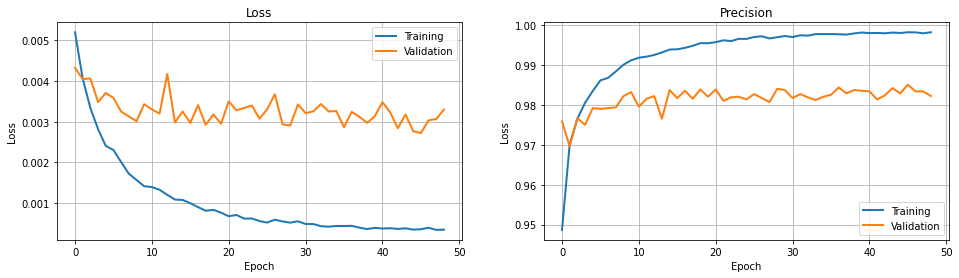

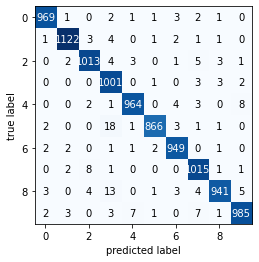

In [ ]:
# == Q6 ==
# Para el mejor modelo obtenido, reporta sus curvas de desempeño respecto a las
# epocas de entrenamiento. También reporta la matriz de confusión para el set de
# test.

# Tomando en cuenta los valores obtenidos el mejor modelos es RMSprop
# Ya que tiene el mayor valor de recall de todos los modelos, y aunque 
# hay una menor pérdida en otros valores, es de los menores.
# De la misma manera, tomando en cuenta la precisión, no es la más alta
# pero en promedio tiene los mejores valores de todos los modelos

# Plot loss and accuracy
plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(history_prueba2.history['loss'], label='Training', linewidth=2)
plt.plot(history_prueba2.history['val_loss'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.subplot(1, 2, 2)
plt.title('Precision')
plt.plot(history_prueba2.history['precision'], label='Training', linewidth=2)
plt.plot(history_prueba2.history['val_precision'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

#Matriz de confusión
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

predY=mlp_prueba2.predict_classes(x_test, verbose=0)
rounded_labels=np.argmax(y_test, axis=1)

cm = confusion_matrix(y_target=rounded_labels, 
                      y_predicted=predY, 
                      binary=False)
cm

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

#Graficas y matriz:

In [ ]:
# == Q7 ==
# Usando tu mejor modelo, ¿Notas algún cambio en el desempeño si usas
# 'categorical_crossentropy' como pérdida, en vez de 'mse'?
# Si sí, ¿cuál es el cambio?

from sklearn.datasets import make_classification
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Se crea clasificador con 10 clases para después verificar su desempeño
X, y = make_classification(
    n_samples=100, n_features=10, n_classes=10, n_informative=5, random_state=0
)

# Se crea una función que regresa el modelo utilizado para maximizar el 
# desempeño

def build_modelo_cross(optimizer):
    mlp = Sequential(name='TenClassCross')
    #Se añaden las entradas que se utilizarán para el modelo
    mlp.add(Input(shape=(784,)))
    mlp.add(Dense(units=512, activation='relu'))
    mlp.add(Dense(units=128, activation='relu'))
    mlp.add(Dense(units=10,  activation='softmax'))
    # Se compila el modelo utilizando pérdida mse y regresando un arreglo de 
    # valores precision, recall y auc.
    # Precision indica la frecuencia en que se predice correctamente la etiqueta
    # Recall opera los aciertos divididos entre aciertos + falsos negativos
    # AUC indica el área bajo la curva al graficar la función
    mlp.compile(
        loss="categorical_crossentropy",
        optimizer=optimizer,
        metrics=[
            keras.metrics.Precision(name="precision"), 
            keras.metrics.Recall(name="recall"),
            keras.metrics.AUC(name="auc"),
        ],
    )
    return mlp


# Training Modelo 1
mlp_prueba_cross = build_modelo_cross('rmsprop')
history_prueba_cross = mlp_prueba1.fit(x=x_train, y=y_train, batch_size=25, epochs=50, validation_split=0.1)


Epoch 1/50
2160/2160 [==============================] - 7s 3ms/step - loss: 0.0091 - precision: 0.9616 - recall: 0.9279 - auc: 0.9948 - val_loss: 0.0074 - val_precision: 0.9702 - val_recall: 0.9428 - val_auc: 0.9965
Epoch 2/50
2160/2160 [==============================] - 7s 3ms/step - loss: 0.0090 - precision: 0.9624 - recall: 0.9287 - auc: 0.9948 - val_loss: 0.0073 - val_precision: 0.9707 - val_recall: 0.9427 - val_auc: 0.9966
Epoch 3/50
2160/2160 [==============================] - 7s 3ms/step - loss: 0.0089 - precision: 0.9627 - recall: 0.9293 - auc: 0.9949 - val_loss: 0.0073 - val_precision: 0.9704 - val_recall: 0.9443 - val_auc: 0.9966
Epoch 4/50
2160/2160 [==============================] - 7s 3ms/step - loss: 0.0089 - precision: 0.9628 - recall: 0.9298 - auc: 0.9950 - val_loss: 0.0072 - val_precision: 0.9699 - val_recall: 0.9437 - val_auc: 0.9966
Epoch 5/50
2160/2160 [==============================] - 7s 3ms/step - loss: 0.0088 - precision: 0.9634 - recall: 0.9306 - auc: 0.9950 - 

In [ ]:
def max_loss(datos1, N): 
    final_list = [] 
    list1 = datos1
  
    for i in range(0, N):  
        max1 = 0
          
        for j in range(len(list1)):      
            if list1[j] > max1: 
                max1 = list1[j]; 
                  
        list1.remove(max1); 
        final_list.append(max1) 
          
    return final_list
  

In [ ]:
perdida_cross = max_loss(history_prueba_cross.history['loss'],1)
print("El valor más alto de pérdida utilizando categorical cross entropy fue:")
print(perdida_cross)
precision_cross = max_loss(history_prueba_cross.history['precision'],1)
print("El valor más alto de precisión utilizando categorical cross entropy fue:")
print(precision_cross)

El valor más alto de pérdida utilizando categorical cross entropy fue:
[0.00911418255418539]
El valor más alto de precisión utilizando categorical cross entropy fue:
[0.9748933911323547]


In [ ]:
# Comparando con los valores obtenidos con mse, que dió 0.005265
# Vemos que nuestro valor de pérdida es mayor con categorical cross entropy
# Lo cual nos indica que hay un cambio que resulta en una deficiencia en 
# los resultados, al tener pérdidas mayores y menor precisión según los 
# valores observados

In [ ]:
# Deadline:
# Lunes 19 de octubre, 6 pm.
# Enviar por correo, en PDF, los resultados y las respuestas solicitadas.
# sugerencia: prueben sus modelos en google colab